In [1]:
# import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# import dataset
data=pd.read_csv(r"C:\Users\NAMO\Downloads/50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit,Unnamed: 5,Unnamed: 6
0,165349.20,136897.80,471784.10,New York,192261.83,NaN,NaN
1,162597.70,151377.59,443898.53,California,191792.06,NaN,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,NaN,http://localhost:8888/notebooks/multi.ipynb
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN,NaN
5,131876.90,99814.71,362861.36,New York,156991.12,NaN,NaN
6,134615.46,147198.87,127716.82,California,156122.51,NaN,NaN
7,130298.13,145530.06,323876.68,Florida,155752.60,NaN,NaN
8,120542.52,148718.95,311613.29,New York,152211.77,NaN,NaN
9,123334.88,108679.17,304981.62,California,149759.96,NaN,NaN


## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
 5   Unnamed: 5       0 non-null      float64
 6   Unnamed: 6       1 non-null      object 
dtypes: float64(5), object(2)
memory usage: 2.9+ KB


In [4]:
data1=data.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
data1


,RDS,ADMS,MKTS,State,Profit,Unnamed: 5,Unnamed: 6
0,165349.20,136897.80,471784.10,New York,192261.83,NaN,NaN
1,162597.70,151377.59,443898.53,California,191792.06,NaN,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,NaN,http://localhost:8888/notebooks/multi.ipynb
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN,NaN
5,131876.90,99814.71,362861.36,New York,156991.12,NaN,NaN
6,134615.46,147198.87,127716.82,California,156122.51,NaN,NaN
7,130298.13,145530.06,323876.68,Florida,155752.60,NaN,NaN
8,120542.52,148718.95,311613.29,New York,152211.77,NaN,NaN
9,123334.88,108679.17,304981.62,California,149759.96,NaN,NaN


In [5]:
data1[data1.duplicated()] # No duplicated data


,RDS,ADMS,MKTS,State,Profit,Unnamed: 5,Unnamed: 6


In [6]:
data1.describe()


,RDS,ADMS,MKTS,Profit,Unnamed: 5
count,50.000000,50.000000,50.000000,50.000000,0.0
mean,73721.615600,121344.639600,211025.097800,112012.639200,NaN
std,45902.256482,28017.802755,122290.310726,40306.180338,NaN
min,0.000000,51283.140000,0.000000,14681.400000,NaN
25%,39936.370000,103730.875000,129300.132500,90138.902500,NaN
50%,73051.080000,122699.795000,212716.240000,107978.190000,NaN
75%,101602.800000,144842.180000,299469.085000,139765.977500,NaN
max,165349.200000,182645.560000,471784.100000,192261.830000,NaN


## correlation Analysis

In [7]:
data1.corr()

,RDS,ADMS,MKTS,Profit,Unnamed: 5
RDS,1.000000,0.241955,0.724248,0.972900,NaN
ADMS,0.241955,1.000000,-0.032154,0.200717,NaN
MKTS,0.724248,-0.032154,1.000000,0.747766,NaN
Profit,0.972900,0.200717,0.747766,1.000000,NaN
Unnamed: 5,NaN,NaN,NaN,NaN,NaN


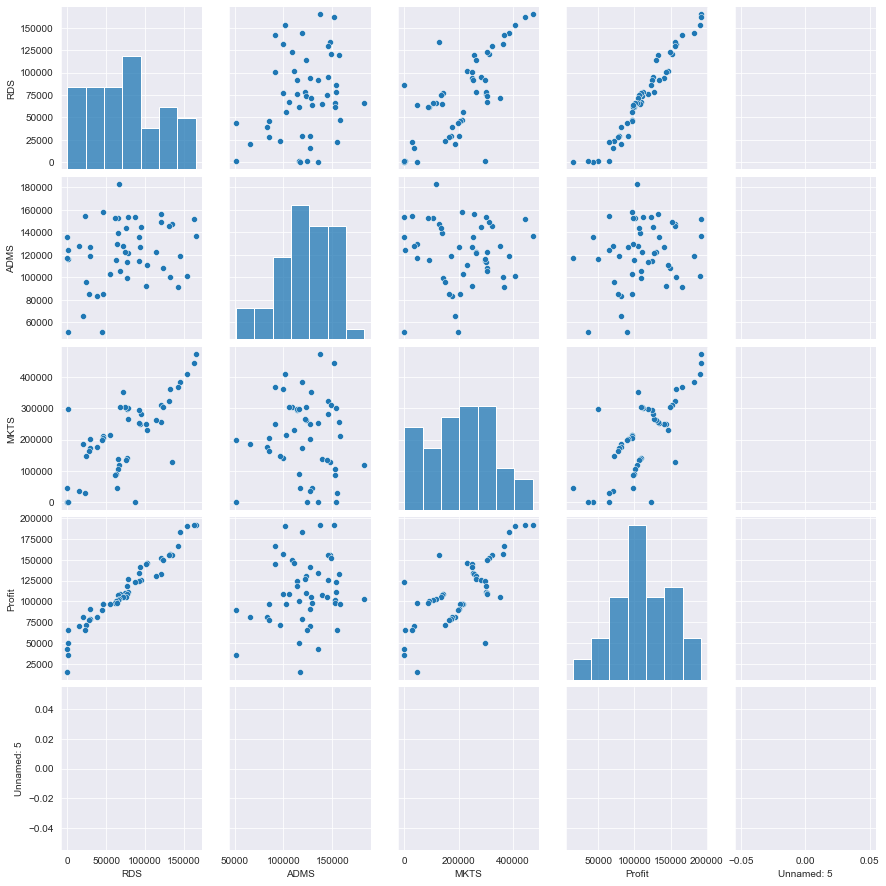

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

## model building

In [9]:
model=smf.ols("Profit~RDS+ADMS+MKTS",data=data1).fit()


## model testing

In [10]:
# Finding Coefficient parameters
model.params

Intercept    50122.192990
RDS              0.805715
ADMS            -0.026816
MKTS             0.027228
dtype: float64

In [11]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RDS          17.846374
 ADMS         -0.525507
 MKTS          1.655077
 dtype: float64,
 Intercept    0.00000
 RDS          0.00000
 ADMS         0.60176
 MKTS         0.10472
 dtype: float64)

In [12]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  # Model accuracy is 94.75%

(0.9507459940683246, 0.9475337762901719)

In [13]:
# Build SLR and MLR models for insignificant variables 'ADMS' and 'MKTS'
# Also find their tvalues and pvalues

In [14]:
slr_a=smf.ols("Profit~ADMS",data=data1).fit()
slr_a.tvalues , slr_a.pvalues  # ADMS has in-significant pvalue

(Intercept    3.040044
 ADMS         1.419493
 dtype: float64,
 Intercept    0.003824
 ADMS         0.162217
 dtype: float64)

In [15]:
slr_m=smf.ols("Profit~MKTS",data=data1).fit()
slr_m.tvalues , slr_m.pvalues  # MKTS has significant pvalue

(Intercept    7.808356
 MKTS         7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKTS         4.381073e-10
 dtype: float64)

In [16]:
mlr_am=smf.ols("Profit~ADMS+MKTS",data=data1).fit()
mlr_am.tvalues , mlr_am.pvalues  # varaibles have significant pvalues

(Intercept    1.142741
 ADMS         2.467779
 MKTS         8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMS         1.729198e-02
 MKTS         9.727245e-11
 dtype: float64)

## Model Validation
### Two Techniques: 1. Collinearity Check & 2. Residual Analysis

In [17]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables

rsq_r=smf.ols("RDS~ADMS+MKTS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADMS~RDS+MKTS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MKTS~RDS+ADMS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RDS','ADMS','MKTS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RDS,2.468903
1,ADMS,1.175091
2,MKTS,2.326773


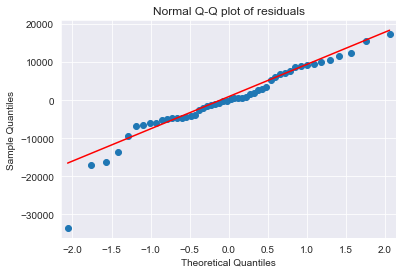

In [18]:
# None variable has VIF>20, No Collinearity, so consider all varaibles in Regression equation
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)

sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [20]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)

def standard_values(vals) : return (vals-vals.mean())/vals.std()  # User defined z = (x - mu)/sigma

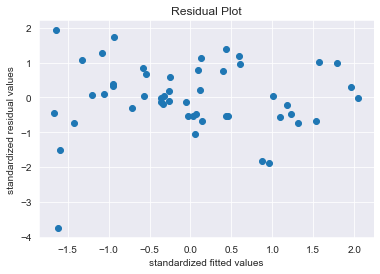

In [22]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

In [23]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig)    # exog = x-variable & endog = y-variable

eval_env: 1


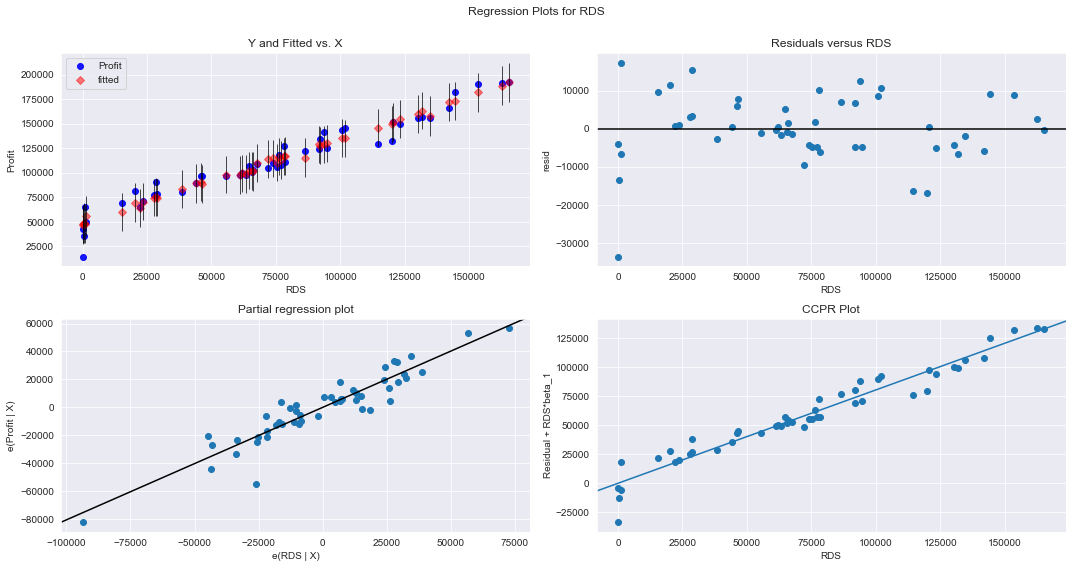

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'RDS',fig=fig)
plt.show()

eval_env: 1


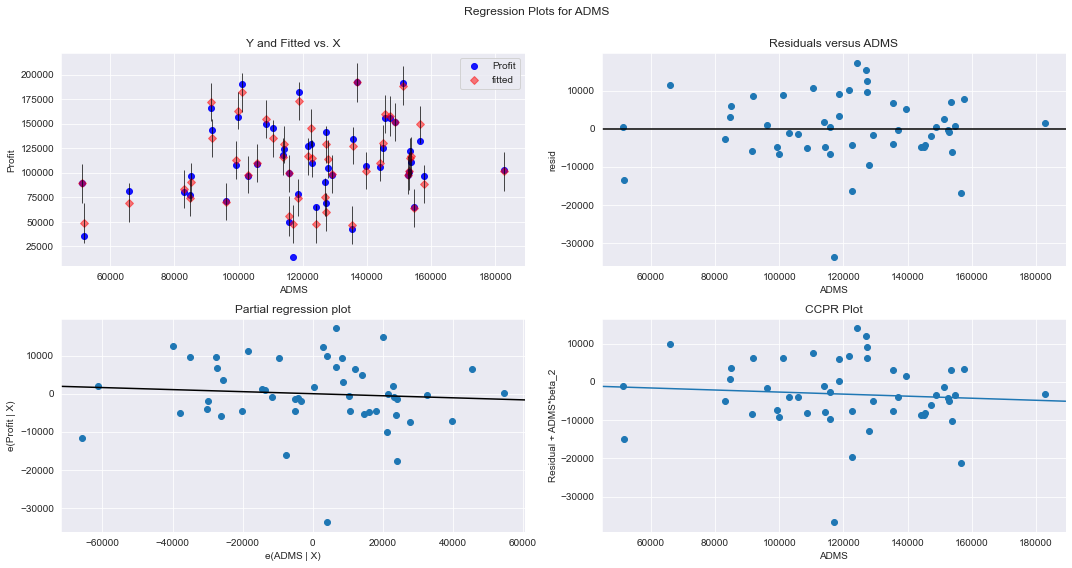

In [25]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'ADMS',fig=fig)
plt.show()

eval_env: 1


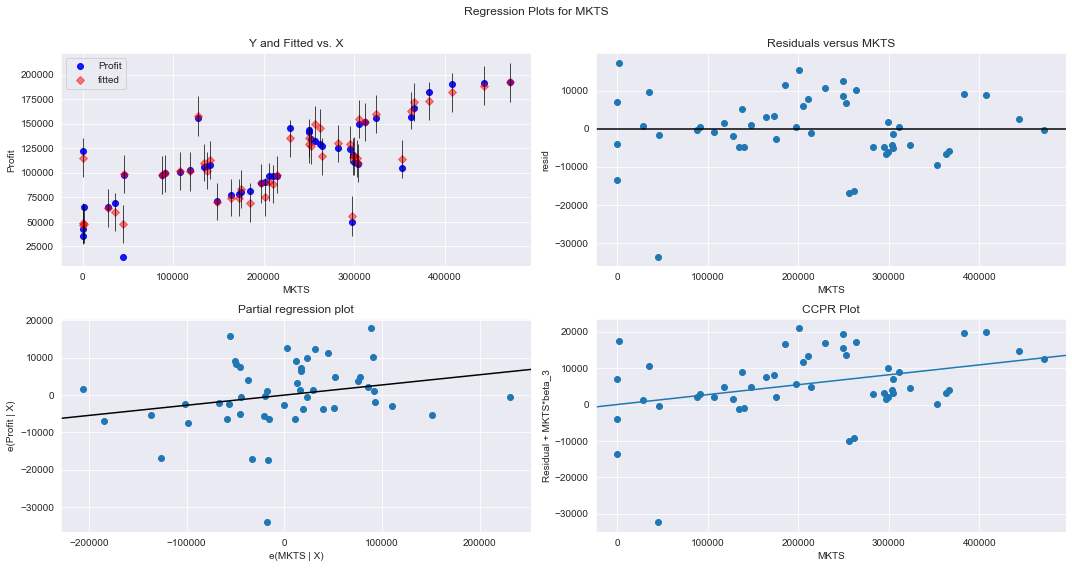

In [26]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'MKTS',fig=fig)
plt.show()

## Model Deletion Diagnostics (checking Outliers or Influencers)
### Two Techniques : 1. Cook's Distance & 2. Leverage value

In [27]:
# 1. Cook's Distance: If Cook's distance > 1, then it's an outlier
# Get influencers using cook's distance
(c,_)=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

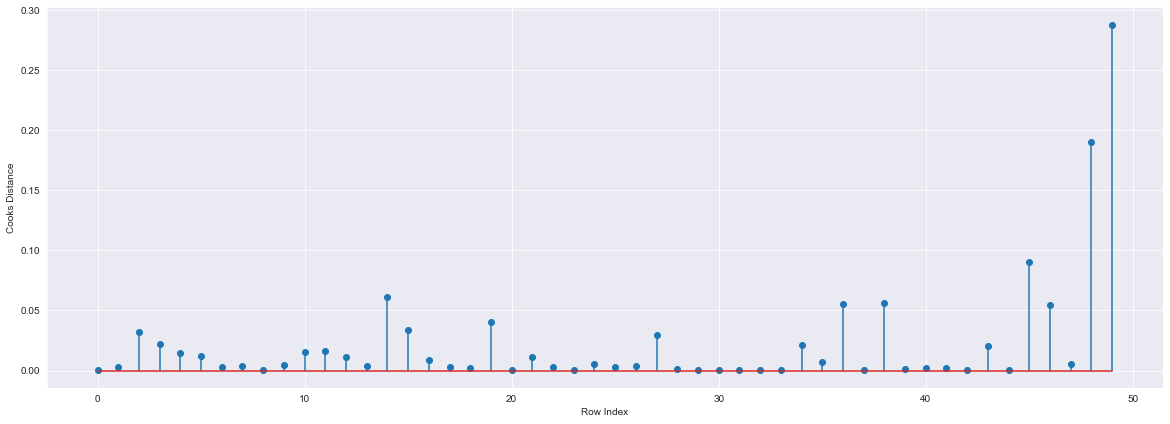

In [28]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [29]:
# Index and value of influencer where C>0.5
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

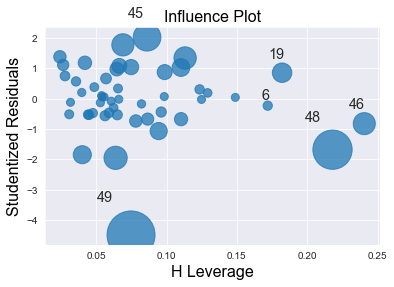

In [30]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
influence_plot(model)
plt.show()

In [31]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.48

In [32]:
data1[data1.index.isin([49])]

,RDS,ADMS,MKTS,State,Profit,Unnamed: 5,Unnamed: 6
49,0.0,116983.8,45173.06,California,14681.4,NaN,NaN


## Imporving the model

In [33]:
# Discard the data points which are influencers and reassign the row number (reset_index(drop=True))
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RDS,ADMS,MKTS,State,Profit,Unnamed: 5,Unnamed: 6
0,165349.20,136897.80,471784.10,New York,192261.83,NaN,NaN
1,162597.70,151377.59,443898.53,California,191792.06,NaN,NaN
2,153441.51,101145.55,407934.54,Florida,191050.39,NaN,NaN
3,144372.41,118671.85,383199.62,New York,182901.99,NaN,http://localhost:8888/notebooks/multi.ipynb
4,142107.34,91391.77,366168.42,Florida,166187.94,NaN,NaN
5,131876.90,99814.71,362861.36,New York,156991.12,NaN,NaN
6,134615.46,147198.87,127716.82,California,156122.51,NaN,NaN
7,130298.13,145530.06,323876.68,Florida,155752.60,NaN,NaN
8,120542.52,148718.95,311613.29,New York,152211.77,NaN,NaN
9,123334.88,108679.17,304981.62,California,149759.96,NaN,NaN


## Model Deletion Diagnostics and Final Model


In [34]:
model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()

In [35]:
while model2.rsquared < 0.99:
    for c in [np.max(c)>1]:
        model2=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        (c,_)=model2.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        data2
    else:
        final_model=smf.ols("Profit~RDS+ADMS+MKTS",data=data2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9626766170294073
Thus model accuracy is improved to 0.9614129113440602
Thus model accuracy is improved to 0.962593650298269
Thus model accuracy is improved to 0.9638487279209413
Thus model accuracy is improved to 0.9663901957918793
Thus model accuracy is improved to 0.9706076169779905
Thus model accuracy is improved to 0.9727840588916423
Thus model accuracy is improved to 0.9734292907181952
Thus model accuracy is improved to 0.9785801571833451
Thus model accuracy is improved to 0.9777383743090916
Thus model accuracy is improved to 0.9790510088977512
Thus model accuracy is improved to 0.9790004461890552
Thus model accuracy is improved to 0.9807878666153609
Thus model accuracy is improved to 0.9838299343609735
Thus model accuracy is improved to 0.983114992639277
Thus model accuracy is improved to 0.9833768520972176
Thus model accuracy is improved to 0.9878892536376698
Thus model accuracy is improved to 0.9877191935547199
Thus model accuracy is improve

In [36]:
final_model.rsquared 

0.9882757054424702

In [37]:
data2

,RDS,ADMS,MKTS,State,Profit,Unnamed: 5,Unnamed: 6
0,142107.34,91391.77,366168.42,Florida,166187.94,NaN,NaN
1,131876.90,99814.71,362861.36,New York,156991.12,NaN,NaN
2,130298.13,145530.06,323876.68,Florida,155752.60,NaN,NaN
3,120542.52,148718.95,311613.29,New York,152211.77,NaN,NaN
4,123334.88,108679.17,304981.62,California,149759.96,NaN,NaN
5,91992.39,135495.07,252664.93,California,134307.35,NaN,NaN
6,94657.16,145077.58,282574.31,New York,125370.37,NaN,NaN
7,91749.16,114175.79,294919.57,Florida,124266.90,NaN,NaN
8,76253.86,113867.30,298664.47,California,118474.03,NaN,NaN
9,67532.53,105751.03,304768.73,Florida,108733.99,NaN,NaN


## 